In [31]:
import sys
sys.path.append('../')
import pandas as pd
import seaborn as sns; sns.set(style='darkgrid', context='poster')
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from figures.plotting import plot_metrics_vs_other, plot_correlations

benchmark = 'dicarlo.MajajHong2015.IT.public-pls'
man_metric = 'signal-noise-ratio (mean)'
pooling_enc = False
dataset_man = 'imagenet'
pooling_man = True

data = pd.merge(pd.read_csv(f'../results/encoding|benchmark:{benchmark}|pooling:{pooling_enc}.csv'),
                pd.read_csv(f'../results/manifolds|dataset:{dataset_man}|pooling:{pooling_man}.csv'), 
                on=['architecture', 'task', 'kind', 'source', 'layer'])

metric_columns = ['between-concept radius', 'within-concept radius (mean)', 'between-concept dimensionality', 'within-concept dimensionality (mean)', 
                  'signal (mean)', 'bias (mean)', 'other signal-noise-overlap (mean)', 'self signal-noise-overlap (mean)', 'signal-noise-ratio (mean)']
metric_label_map = {'between-concept dimensionality': 'inter-dim', 'between-concept radius': 'inter-radius', 
                    'bias (mean)': 'bias', 'signal (mean)': 'signal', 'signal-noise-ratio (mean)': 'snr', 
                    'other signal-noise-overlap (mean)': 'other-sno', 'self signal-noise-overlap (mean)': 'self-sno', 
                    'within-concept dimensionality (mean)': 'intra-dim', 'within-concept radius (mean)': 'intra-radius'}
metric_short_labels = [metric_label_map[c] for c in metric_columns]
tf_to_pt_layer_map = {'encode_2': 'layer1.0.relu', 'encode_3': 'layer1.1.relu', 
                      'encode_4': 'layer2.0.relu', 'encode_5': 'layer2.1.relu', 
                      'encode_6': 'layer3.0.relu', 'encode_7': 'layer3.1.relu', 
                      'encode_8': 'layer4.0.relu', 'encode_9': 'layer4.1.relu'}
data.loc[:, 'layer'] = data['layer'].replace(tf_to_pt_layer_map)

data.head()

,layer,score,score_error,architecture,task,kind,source,between-concept dimensionality,between-concept radius,bias (mean),...,self signal-noise-overlap (mean),self signal-noise-overlap (std),signal (mean),signal (std),signal-noise-ratio (mean),signal-noise-ratio (std),within-concept dimensionality (mean),within-concept dimensionality (std),within-concept radius (mean),within-concept radius (std)
0,layer1.0.relu,0.204081,0.003728,ResNet18,None,Untrained,PyTorch,1.704984,0.166517,0.011452,...,17.181889,12.088973,3.839324,2.117621,0.470619,0.222551,2.411089,0.542786,0.381357,0.041603
1,layer1.1.relu,0.208386,0.004585,ResNet18,None,Untrained,PyTorch,1.605870,0.217237,0.009361,...,16.071751,11.302962,3.562639,1.937455,0.435808,0.196699,2.481886,0.544630,0.539978,0.053162
2,layer2.0.relu,0.217741,0.004420,ResNet18,None,Untrained,PyTorch,1.744236,0.238763,0.007123,...,14.261954,9.846807,3.382583,1.730361,0.448707,0.196209,2.869248,0.665318,0.631207,0.053368
3,layer2.1.relu,0.218863,0.003893,ResNet18,None,Untrained,PyTorch,1.636047,0.315293,0.007442,...,14.922991,10.539876,3.344943,1.790118,0.420489,0.191367,2.483652,0.529868,0.836199,0.071683
4,layer3.0.relu,0.219415,0.004056,ResNet18,None,Untrained,PyTorch,1.706525,0.345574,0.006555,...,12.969792,9.373237,3.099802,1.657742,0.420617,0.190806,2.913386,0.664664,0.991866,0.079256


---
# All models and layers

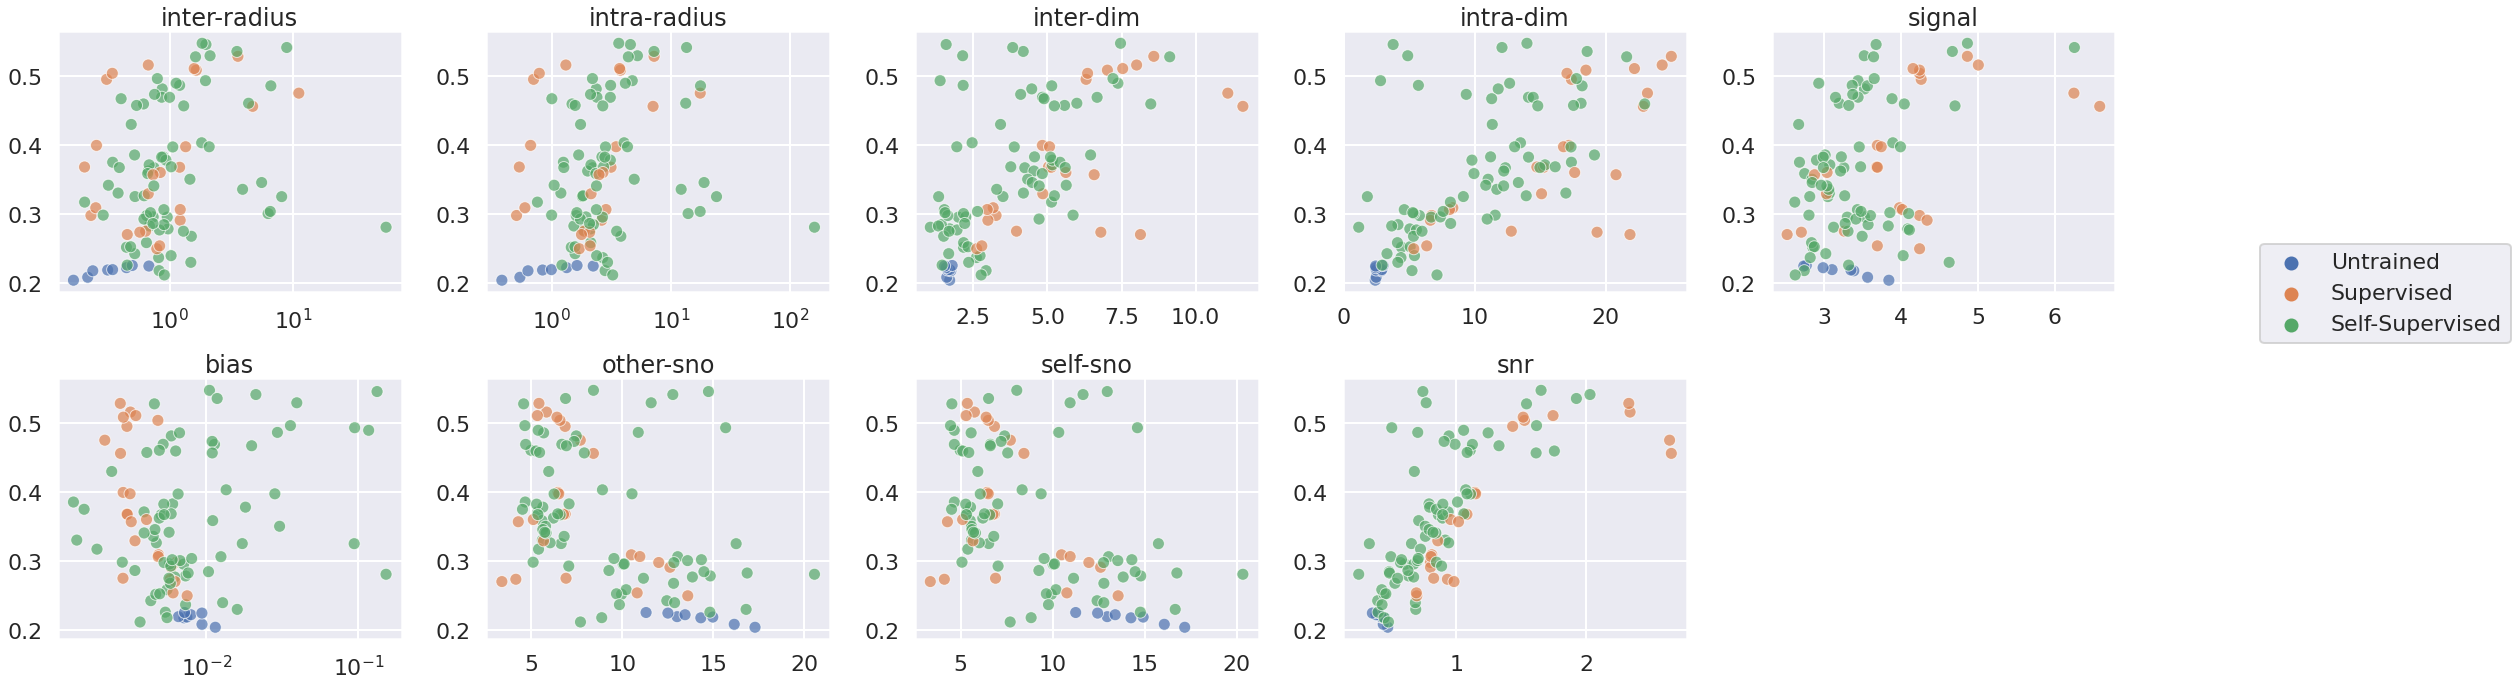

In [32]:
results = data[(data.architecture == 'ResNet18')]

fig, axs = plot_metrics_vs_other(data=results, xs=metric_columns, y='score', hue='kind', 
                                 labels=metric_short_labels, fig_kwargs={'figsize': (30, 10)}, plt_kwargs={'alpha': 0.7})
axs[0].set_xscale('log')
axs[1].set_xscale('log')
axs[5].set_xscale('log')
plt.show()

---
# Untrained and Supervised Object Classification

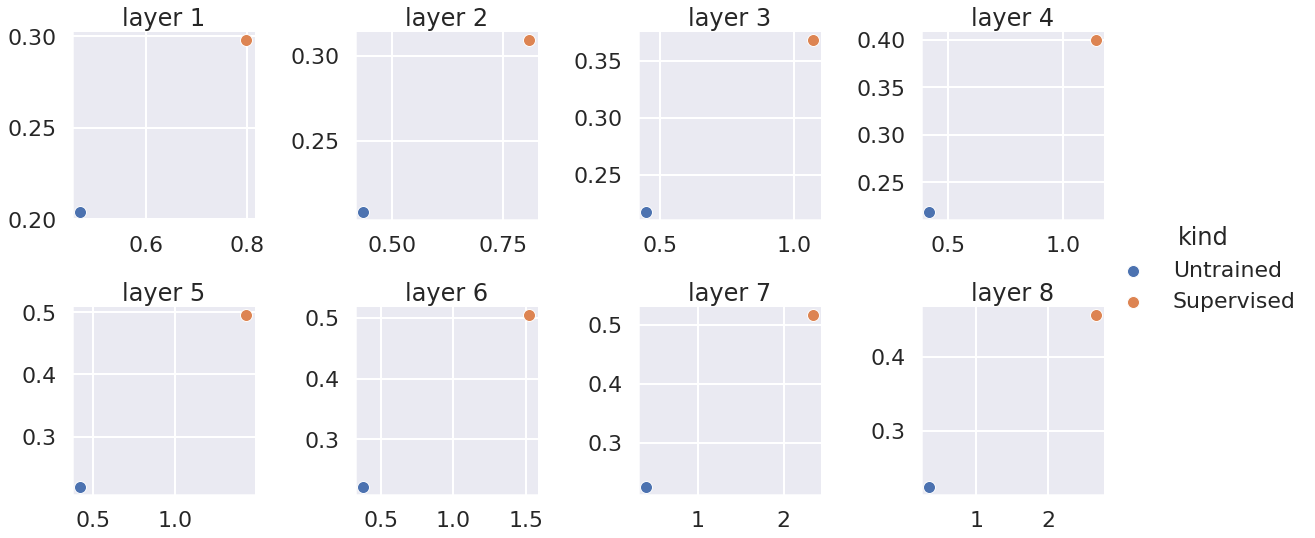

In [33]:
results = data[(data.source == 'PyTorch') & 
               (data.architecture == 'ResNet18')]
g = plot_correlations(data=results, x=man_metric, y='score', hue='kind', grid='layer', 
                      grid_kwargs={'height': 4, 'sharex': False, 'sharey': False, 'col_wrap': 4})
for i, ax in enumerate(g.axes.flat):
    ax.set_title(f'layer {i + 1}')
g.set(xlabel=None, ylabel=None)
plt.tight_layout()
g.add_legend()
plt.show()

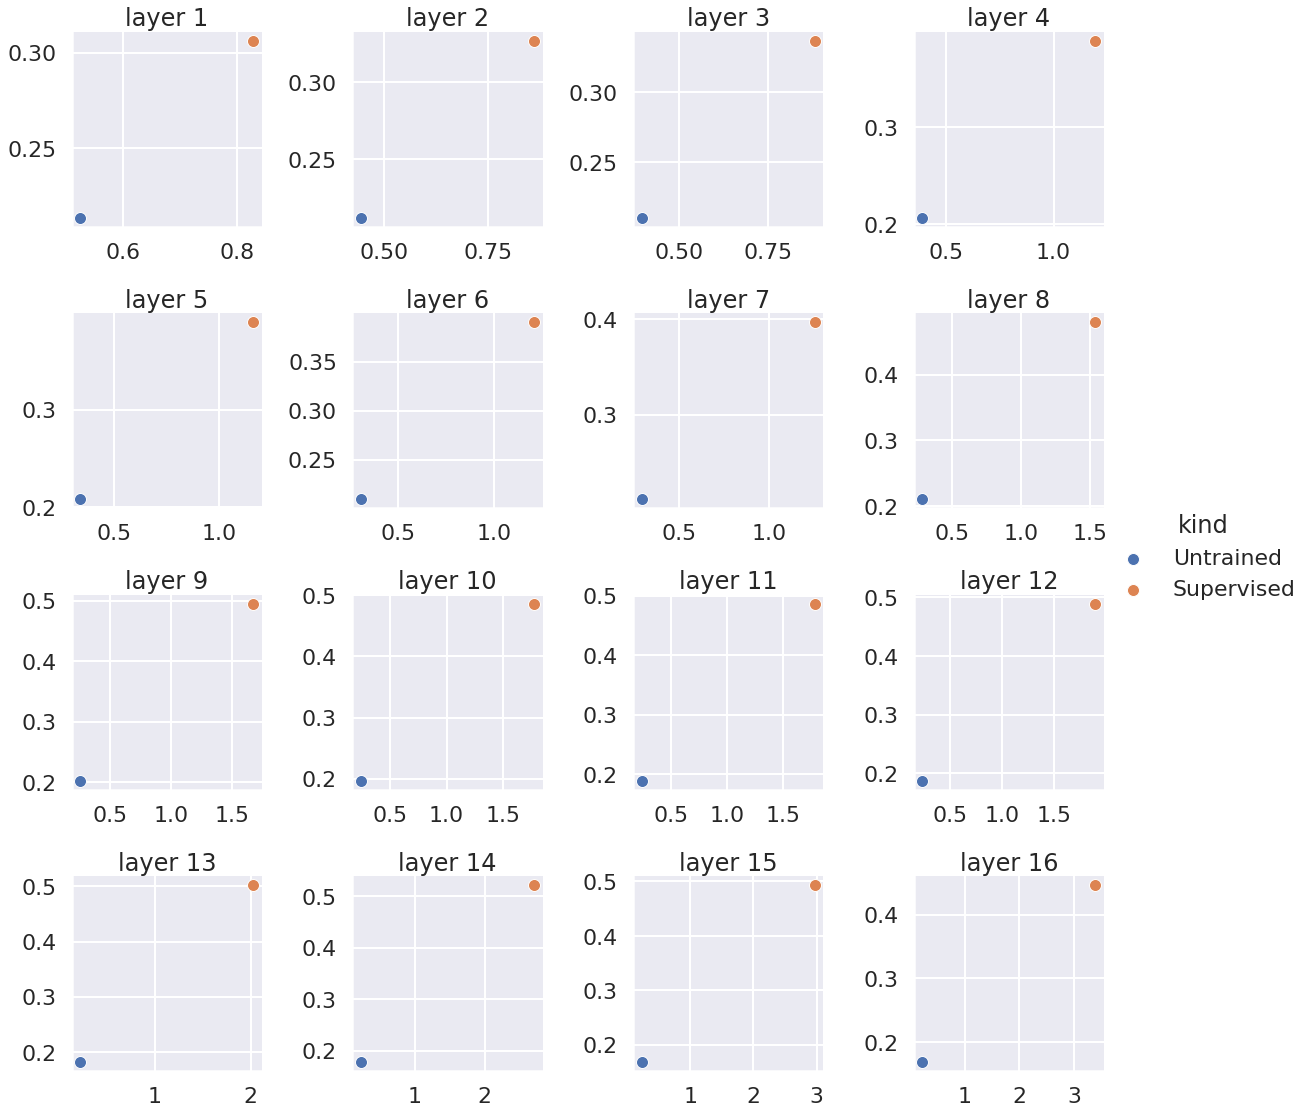

In [34]:
results = data[(data.source == 'PyTorch') & 
               (data.architecture == 'ResNet50')]
g = plot_correlations(data=results, x=man_metric, y='score', hue='kind', grid='layer', 
                      grid_kwargs={'height': 4, 'sharex': False, 'sharey': False, 'col_wrap': 4})
for i, ax in enumerate(g.axes.flat):
    ax.set_title(f'layer {i + 1}')
g.set(xlabel=None, ylabel=None)
plt.tight_layout()
g.add_legend()
plt.show()

---
# Yamins Self-Supervised

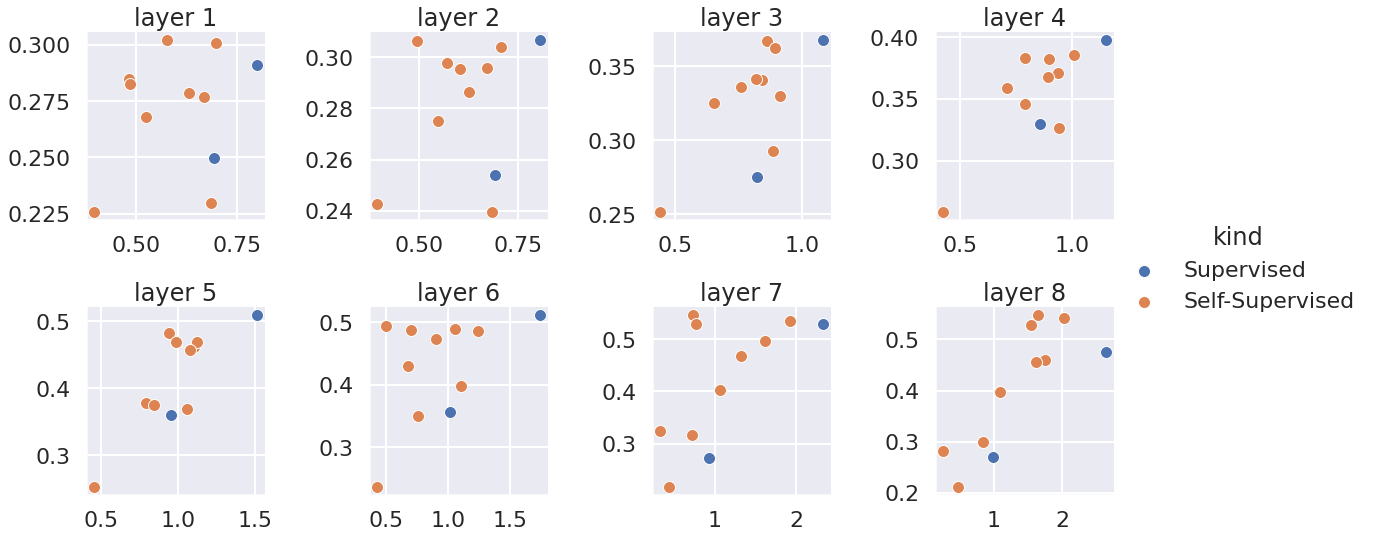

In [35]:
results = data[(data.source == 'VVS')]
g = plot_correlations(data=results, x=man_metric, y='score', hue='kind', grid='layer', 
                      grid_kwargs={'height': 4, 'sharex': False, 'sharey': False, 'col_wrap': 4})
for i, ax in enumerate(g.axes.flat):
    ax.set_title(f'layer {i + 1}')
g.set(xlabel=None, ylabel=None)
plt.tight_layout()
g.add_legend()
plt.show()

---
# Taskonomy

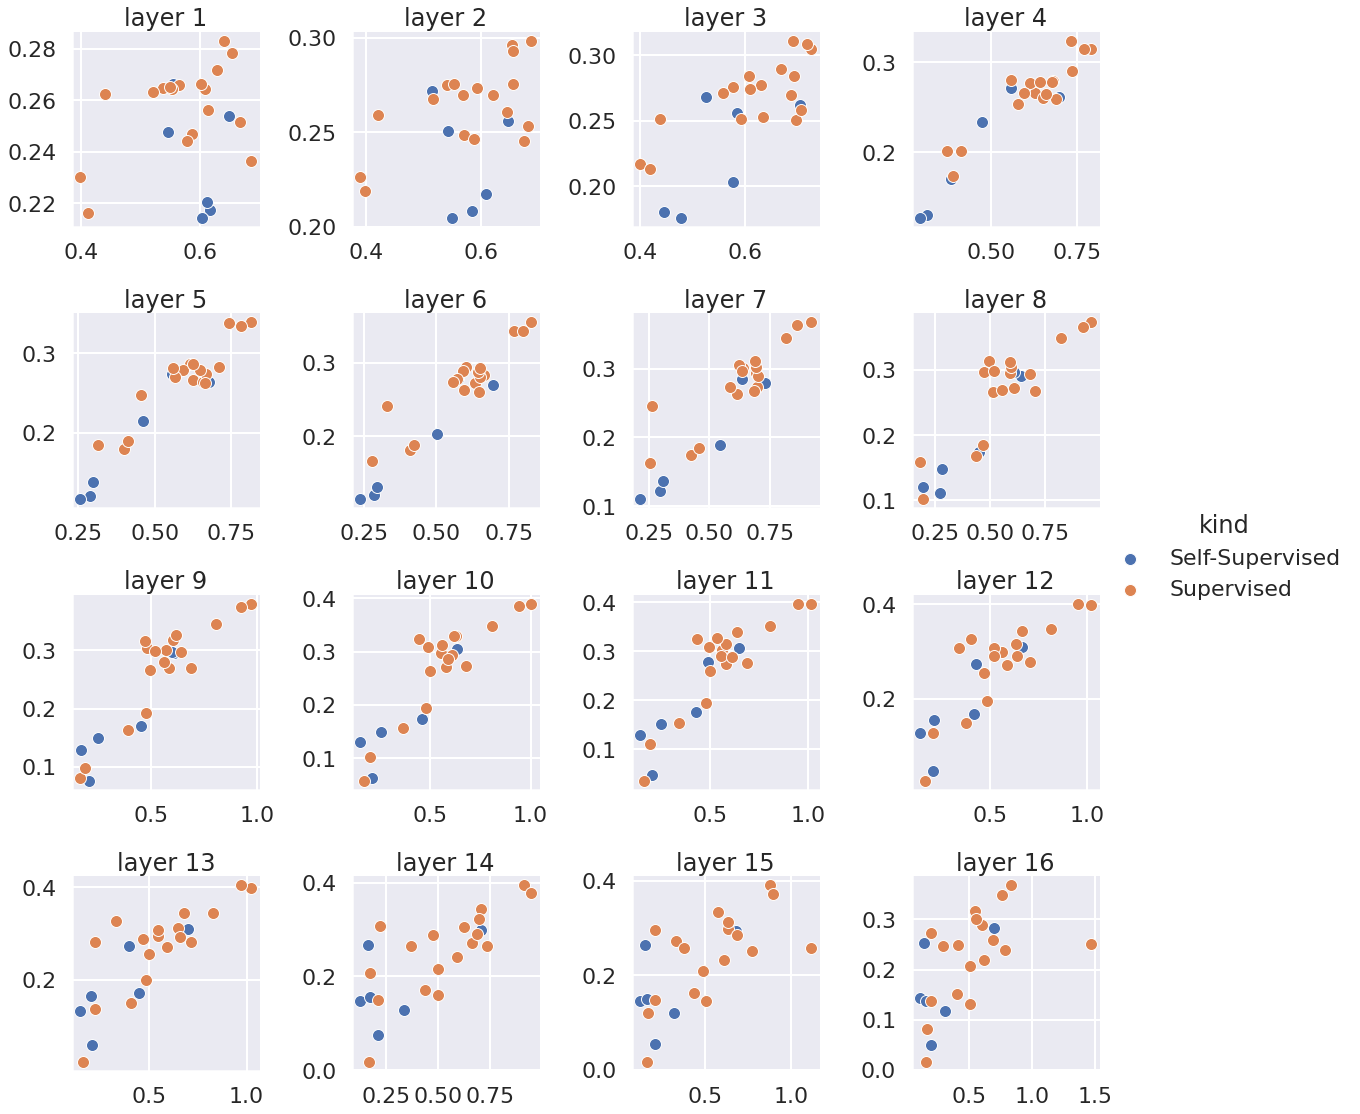

In [36]:
results = data[(data.source == 'Taskonomy')]
g = plot_correlations(data=results, x=man_metric, y='score', hue='kind', grid='layer', 
                      grid_kwargs={'height': 4, 'sharex': False, 'sharey': False, 'col_wrap': 4})
for i, ax in enumerate(g.axes.flat):
    ax.set_title(f'layer {i + 1}')
g.set(xlabel=None, ylabel=None)
plt.tight_layout()
g.add_legend()
plt.show()